# Fundació Integramenet - Analisis Impacto COVID19 

## Variables  "Texto"


### __Contenido__

- 5. Análisis sobre las columnas de texto
     - 5.a "Resumen entrevista y observaciones"
       - 5.a.1 Preproceso
       - 5.a.2 Analyzing text statistics
       - 5.a.3 Ngram exploration
       - 5.a.4 WordCloud
       - 5.a.5 Sentiment analysis
       - 5.a.6 Algunas conclusiones 
     - 5.b "Ultimas acciones hechas"
       - 5.b.1 Preproceso
       - 5.b.2 Analyzing text statistics
       - 5.b.3 Ngram exploration
       - 5.b.4 WordCloud
       - 5.b.5 Conclusiones 
     - 5.c "Condiciones vivienda"
       - 5.c.1 Preproceso
       - 5.c.2 Analyzing text statistics
       - 5.c.3 Ngram exploration
       - 5.c.4 WordCloud
       - 5.c.5 Conclusiones 

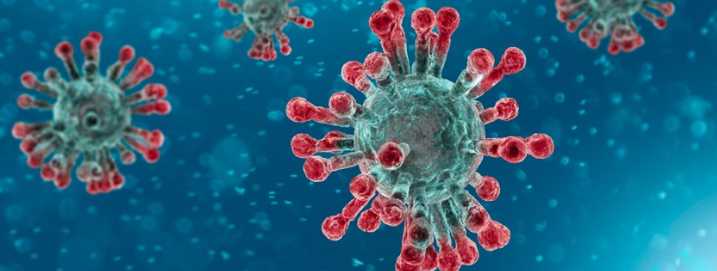

In [1]:
Image("COVID19.png")

## 5. NLP sobre las columnas de texto



En el dataset hay tres columnas de tipo texto que son:  __"Resum entrevista i observacions", "Ultimas acciones hechas" y "Condiciones Vivienda"__, pensamos que podrían tener información general sobre las condiciones de las personas entrevistadas. Pero hemos comentado en las reuniones que no sabíamos como "manipularlas" pero tampoco queríamos eliminarlas. Se hará un primer análisis experimental sobre una de ellas, aplicando técnicas básicas de __"Natual Language Processing"(NLP)__.    

### Improtando los datos

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv('./SO_COVID19_DATOS.csv', sep=';',encoding='latin1')

In [3]:
df.columns

Index(['Document', 'Genere', 'Alta Incorpora', 'Objectiu laboral', 'Estat',
       'ultima acció', 'Ultimes accions fetes Observacions', 'Estat salud',
       'Habitatge', 'Condicions habitatge', 'Municipi', 'Padrón',
       'Alimentació garantida', 'Seguiment Serveis Social',
       'Targeta Sanitaria', 'Autovaloració estat psicoemocional',
       'Què espera de nosaltres', 'Necessitats actuals',
       'Resum entrevista i observacions', 'Recurs recomanat   ',
       'Si estàn en recerca feina', 'Baixes', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [4]:
#remove the columns created by defaul without any values
df.drop(['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'], axis = 1, inplace = True)

In [5]:
#check the dataset after removing the previous variables
df.head()

,Document,Genere,Alta Incorpora,Objectiu laboral,Estat,ultima acció,Ultimes accions fetes Observacions,Estat salud,Habitatge,Condicions habitatge,...,Alimentació garantida,Seguiment Serveis Social,Targeta Sanitaria,Autovaloració estat psicoemocional,Què espera de nosaltres,Necessitats actuals,Resum entrevista i observacions,Recurs recomanat,Si estàn en recerca feina,Baixes
0,NIE,D,si,Cuidadora,Confinada,Març,"Cuida net, filla treballa",Bo,No ha canviat,"Bones. Viu amb filla, gendre i 1 net. Petita t...",...,Amb dificultats (només mengen arros i alubies),No,Si,7.5,Suport Ocupació,Aliments. De moment tenen 10 dies per poder al...,Cap persona de la familia no treballa. A l'abr...,Telèfon de reforç de Serveis Socials : 9346240...,NaN,NaN
1,NIE,D,si,Cuidadora,Confinada,Abril,"Segueix treballant en el mateix domicili, pero...",Bo,No ha canviat,Considera que bones. Viu amb fill i marit en 2...,...,SI,No,Si,8,NaN,Cap,Molt bé de salud. Segueix el contracte de dill...,NaN,NaN,NaN
2,PSS,D,si,Cuidadora,Cerca feina,Gener,NaN,Bo,Crític,Viu en habitació propietat de la persona on tr...,...,Crític,SI,Si,5,Suport Ocupació,Pagar habitació i aliments,Està amb Serveis Socials. Li estan facilitant ...,NaN,NaN,NaN
3,PSS,D,no,Cuidadora,NaN,Gener,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No localitzo.,NaN,NaN,NaN
4,PSS,D,no,Neteja,NaN,Gener,Cerca feina. L'han acomiadat després de tenir-...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Document                            318 non-null    object
 1   Genere                              318 non-null    object
 2   Alta Incorpora                      317 non-null    object
 3   Objectiu laboral                    203 non-null    object
 4   Estat                               194 non-null    object
 5   ultima acció                        225 non-null    object
 6   Ultimes accions fetes Observacions  195 non-null    object
 7   Estat salud                         167 non-null    object
 8   Habitatge                           170 non-null    object
 9   Condicions habitatge                142 non-null    object
 10  Municipi                            164 non-null    object
 11  Padrón                              156 non-null    object

## 5.a. "Resumen entrevista y observaciones"

### 5.a.1 Preproceso 

In [7]:
#Importing required libraries
from textblob import TextBlob
import nltk
from googletrans import Translator

In [8]:
# We will work only with the column "Resum entrevista i observacions" 
df_text = df['Resum entrevista i observacions'].copy().to_frame()
df_text.columns = ['Resum'] #Shorting the column name
df_text.head(5) 

,Resum
0,Cap persona de la familia no treballa. A l'abr...
1,Molt bé de salud. Segueix el contracte de dill...
2,Està amb Serveis Socials. Li estan facilitant ...
3,No localitzo.
4,NaN


In [9]:
# Eliminating 'nan' values 
df_text.dropna(subset = ['Resum'], inplace=True)

In [10]:
#-> Convirtiendo minúsculas a mayúsculas
df_text['Resum'] = df_text['Resum'].apply(lambda x: " ".join(x.lower() for x in x.split()))

Vamos a intentar hacer un k-means, sabemos que se puede perder mucha información y precisión en las traducciones. Pero, como esta es una inspección "rápida" para ver si esta columna nos puede ser de utilidad, procederemos a traducir: __Catalán__ -> __Español__

In [11]:
#objeto para usar la librería googletrans 
translator = Translator() 

#Añadiendo como nueva columna, la traducción a Inglés.
df_text['Summary'] = df_text['Resum'].apply(translator.translate, src='ca', dest='en').apply(getattr, args=('text',))

In [12]:
#Viendo si se realizó la traducción. 
df_text['Summary'].head(5)

0    no person in the family does not work. in Apri...
1    good health. follows the agreement Monday to T...
2    is social services. you are providing food. wh...
3                                         I locate it.
6    costing Spanish. says he is working in a chick...
Name: Summary, dtype: object

In [69]:
df_text['Summary'].shape

(140,)

In [13]:
#Eliminando los signos de puntuación
df_text['Summary'] = df_text['Summary'].str.replace('[^\w\s]','')
#Remplazando los carácteres numéricos
df_text['Summary'] =  df_text['Summary'].str.replace('\d+', '')

Obteniendo lematizacion

In [14]:
#Steaming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_text['Summary'] = df_text['Summary'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### 5.a.2 Analyzing text statistics

Ya que tenemos listo nuestro texto para analizarlo, haremos rápidamente las estádisticas correspondientes ya que nos ayudaran a explorar las características fundamentales de los datos. Estas incluyen:
- word frequency analysis,
- sentence length analysis,
- average word length analysis,
- etc.

Primero, miraremos a la cantidad de caracteres presentes en cada oración. Esto puede darnos una idea aproximada sobre la longitud de los resumenes de las entrevistas.

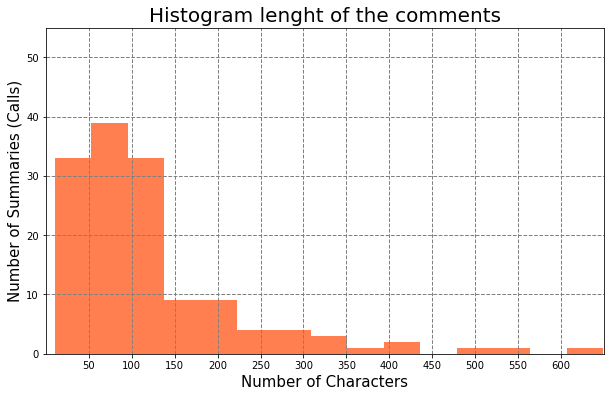

In [64]:
df_text['Summary'].str.len().plot(kind='hist',
                                  figsize=(10, 6), 
                                  bins=15,
                                  xticks=np.arange(50, 650, step=50),
                                  color=['coral'],
                                  stacked=True,
                                  xlim=(0, 650),
                                  ylim = (0, 55) 
                                 )

plt.title('Histogram lenght of the comments', fontsize = 20)
plt.ylabel('Number of Summaries (Calls)', fontsize = 15)
plt.xlabel('Number of Characters', fontsize = 15) 
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()


In [22]:
df_text['Summary'].str.len().max()

649

In [23]:
df_text['Summary'].str.len().min()

10

In [24]:
df_text['Summary'].str.len().mean()

120.72857142857143

Este histograma muestra que los resumenes van desde 0 a 700 caracteres, y que generalmente hay entre 0-200 caracteres. 

Ahora vamos a explorar a nivel de palabras. 

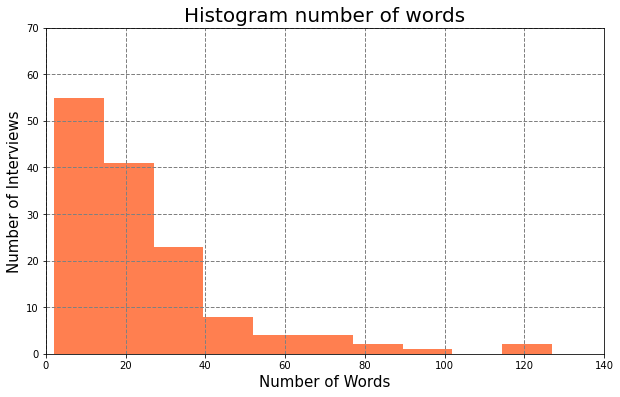

In [87]:
#def plot_word_number_histogram(text):
df_text['Summary'].str.split().map(lambda x: len(x)).plot(
                                      kind='hist',
                                      figsize=(10, 6), 
                                      bins=10,
                                      xticks=np.arange(0, 150, step=20),
                                      color=['coral'],
                                      stacked=True,
                                      xlim=(0, 140),
                                      ylim = (0, 70))

plt.title('Histogram number of words', fontsize = 20)
plt.ylabel('Number of Interviews', fontsize = 15)
plt.xlabel('Number of Words', fontsize = 15) 
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()
    
#plot_word_number_histogram(df_text['Summary'])

Vemos que generalmente los comentarios tienen en 5 y 40 palabras, pero... deberíamos quitar las "Stopwords" que son las palabras más comunes usadas en cualquier lenguaje (Ejemplo en Inglés: "the”,” a”,” an”).

Vamos a por las "Stopwords" que no nos sirven para el análisis.

In [17]:
from nltk.corpus import stopwords
#Descargando y guardando las stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     gabacho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
#Getting stopwords in our Translation 
df_text['stopwords'] = df_text['Summary'].apply(lambda x: len([x for x in x.split() if x in stop]))

#Displaying each Summary comment with it # of stopwords
df_text[['Summary','stopwords']].head()

,Summary,stopwords
0,no person in the family does not work in April...,59
1,good health follows the agreement Monday to Th...,9
2,is social services you are providing food when...,62
3,I locate it,1
6,costing Spanish says he is working in a chicke...,18


Y ahora graficamos las "stopword" más comunes. 

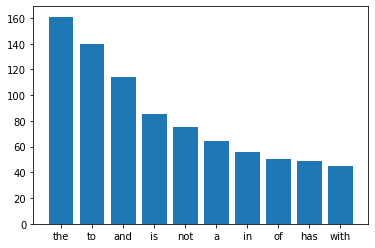

In [46]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(df_text['Summary'])

Vemos que "the", "to", "and" e "is" son las más comunes.

Las quitamos, ya que nos estorban para el análisis. 

In [ ]:
#Quito stopwords
df_text['Summary']= df_text['Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Ahora vamos a ver que otras palabras diferentes de las stopwords son las más comunes. 
Para continuar, haremos un "steaming" que nos ayudará a encontrar las raíces de las palabras para unificarlas (por ejemplo palabras como "work"-"working").

In [59]:
#Steaming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df_text['Summary'] = df_text['Summary'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Y ahora graficamos las palabras (sin "stopwords") más comunes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

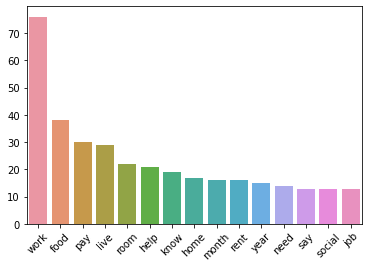

In [74]:
#Getting the most frequent words
freq = pd.Series(' '.join(df_text['Summary']).split()).value_counts()[:15]
#Plotting...
sns.barplot(freq.index, freq.values)
plt.xticks(rotation=45)

Las palabras más comunes son "work", "food", "pay", "live". 

Pero este estudio trata del "COVID19" o "coronavirus", y como podemos ver, en los comentarios de las entrevistas, no es una de las palabras del "Top 15"... entonces, ¿en qué lugar se encuentra?.Buscamos las 30 más frecuentes a ver si la encontramos por ahí. 

In [85]:
#Getting the most frequent words
freq = pd.Series(' '.join(df_text['Summary']).split()).value_counts()[:30]

freq

work        76
food        38
pay         30
live        29
room        22
help        21
know        19
home        17
month       16
rent        16
year        15
need        14
job         13
famili      13
social      13
say         13
hou         12
week        12
one         12
save        12
want        12
covidien    11
mother      11
day         11
hour        11
us          11
situat      11
money       11
two         10
eat         10
dtype: int64

¡Y, sí! vemos __"coviden"__ que correspondería a __"COVID19"__ o __"cornavirus"__ (Esto por el tratamiento de la traducción y la libreria que estamos usando, que no le hemoms dicho de tratarla como un nombre específico de una ennfermeda, eso se podría corregir en un futuro.) 

A manera general, podemos decir que: **a las personas de las cuales tenemos comentarios del "Servei de Ocupació" de la Fundació Integramanet, el __COVID-19__ les está afectando más como una __consecuencia de las medidas sanitarias (conseguir comida, buscar trabajo, pagar alquiler), no como la enfermedad directamente__.** 

## 5.a.3 Ngram exploration

__"Ngramas"__ son las secuencias contiguas de $n$ palabras. Mirar los n-gramas más frecuentes puede ayudar a una mejor comprensión del contexto en el que se usó la palabra.

Para seguir con esta parte, vamos a quitar las "stopword", y cargamos lo necesario para hacer y graficar el n-grama.

In [82]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

Primero vamos a ver un __"2-grama"__

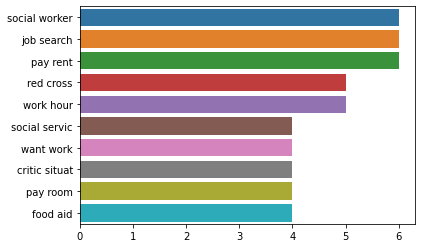

In [83]:
#Getting the "n-gram"
top_n_bigrams=get_top_ngram(df_text['Summary'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

Aquí "Social worker", "job search" y "pay rent" son las más frecuentes. 

Ahora, haremos un __"3-grama"__

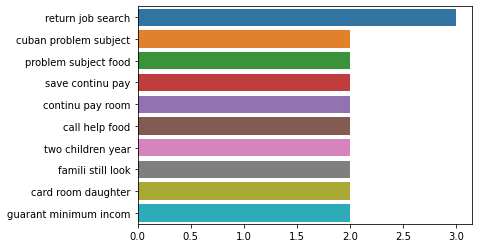

In [84]:
#-> 3-gram
top_tri_grams=get_top_ngram(df_text['Summary'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

En el "3-grama" la de más frecuencia es "return job search", después... las siguientes tienen la misma medida de frecuencia. 

## 5.a.4 WordCloud

Una forma de tener otro panorama general de las palabras más utilizadas es un "WordCloud". 
Creamos el corpus, que es la coleción de textos de nuestros comentarios. 

In [ ]:
corpus=[]
new = df_text['Summary'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

Y ahora obtenemos el "WordCloud"

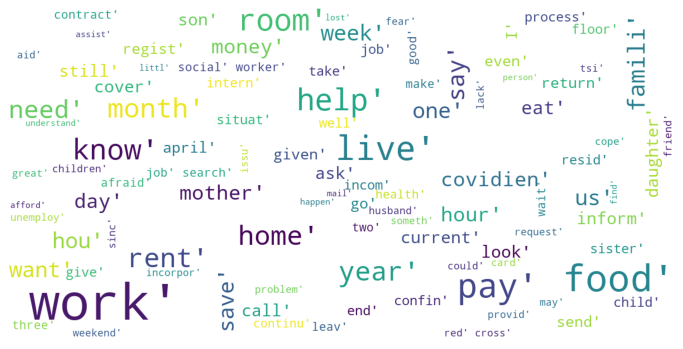

In [90]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

## 5.a.5 Sentiment analysis

Ahora vamos a un punto muy importante, y uno de los objetivos por el cual estamos haciendo este análisis. 
Con esta columna que tiene mucho texto, queríamos intentar poner una "clasifición" a los comentarios de las entrevistas. Sabemos que esto es una tarea difícil, pero no queremos perder datos relevantes que podrán estar en esta variable.

En este análisis de sentimientos, se clasifican los textos con una etiqueta de "positivo", "negativo" o "neutro".

<BarContainer object of 3 artists>

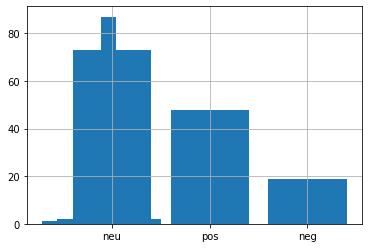

In [92]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_text['polarity_score']=df_text['Summary'].\
   apply(lambda x : polarity(x))
df_text['polarity_score'].hist()

def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df_text['polarity'] = df_text['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(df_text.polarity.value_counts().index,
        df_text.polarity.value_counts())

La mayoría los ha clasificado como "neutro", luego "positivo" y al final "negativos".

Vamos a mirar un poco sobre algunos comentarios clasificados como "positivos".

In [93]:
df_text[df_text['polarity']=='pos']['Summary'].head()

1     good health follow agreement monday thursday e...
2     social servic provid food need send mail socia...
7     live room famili home bolivia take well unders...
10    great incertidumbr want work return countri pr...
11    current work social worker familiar accent cov...
Name: Summary, dtype: object

Ahora vamos con los "negativos".

In [95]:
df_text[df_text['polarity']=='neg']['Summary'].head()

0     person famili work april son work day pay mont...
6     cost spanish say work chicken factori ripollet...
9     covidien benefit never stop work also subject ...
12    make substitut aa friend week send cv resid as...
18    anxiou stress ask financ assist hou comment ne...
Name: Summary, dtype: object

Vemos que en la 9: "covidien benefit never stop work" lo ha clasificado mal. Esto es algo muy común en este tipo de algoritmos, en casi de decidir que vale la pena seguir con esta técnica, esto se podría "refinar".

## 5.a.6 Algunas conclusiones

- De entrada, sabemos que tenemos "pocos" datos para poder trabajar de una manera más robusta en el NLP, pero como hemos mencionado, nos parecía importante analizar un poco los resumenes de las entrevistas.

- Debido a la disponibilidad de las librerias utilizadas, se ha tenido que traducir del catalán al inglés para realizar el análsis (considerando que se puede perder grán cantidad información).

- Los cometarios varian entre 10 y 20 palabras (quitando stopwords), que reflejan el comentario que nos hacía Neus de Integramenet sobre la destreza que debían monstrar los entrevistadores por teléfono para escribir en el Excel. 

- Como palabras más comunes son "work", "food", "pay", "live". Hablando del "COVID19" o "coronavirus" esta se encuentra en el lugar "25".   

- En general, las gráficas y visualizaciones realizadas nos muestran que en general las personas del resumen de las entrevistas tienen como prioridad conseguir comida, buscar trabajo, pagar alquiler... es decir, que el __COVID-19__ les está afectando como __consecuencia social__. 

- Para "clasificar" estos resumenes, hicimos un "análisis de sentimientos" muy básico. Pero hemos visto que deberíamos "refinarlo" más para que la clasificación sea más precisa (como sucede en este tipo de problemas). O, podríamos decidir de utilizar alguna otra técnica como "clustering" de texto no supervisado.

## 5.b Análsis de ultimas acciones hechas

In [29]:
#Si queremos volver a cargarlo (para no rehacer lo de arriba)
df = pd.read_pickle('dataframe.pkl') 

In [70]:
df.columns

Index(['documento', 'genero', 'incorpora', 'obj_laboral', 'estado',
       'ult_accions_hechas', 'estado_salud', 'vivienda', 'cond_vivienda',
       'municipio', 'padron', 'alimentacion', 'seguimento_ss', 'targeta_san',
       'autovaloracion_psicoemo', 'espera_dIntegramanet', 'resum', 'bajas'],
      dtype='object')

In [71]:
df.shape

(135, 18)

### 5.b.1 Preproceso

In [31]:
# We will work only with the column "Resum entrevista i observacions" 
df2 = df['ult_accions_hechas'].copy().to_frame()
df2.head(5) 

,ult_accions_hechas
0,"Cuida net, filla treballa"
1,"Segueix treballant en el mateix domicili, pero..."
2,NaN
3,Compet Tècniques
4,NaN


In [72]:
# Eliminating 'nan' values, in order to work only with the text
df2.dropna(subset = ['ult_accions_hechas'], inplace=True)

In [73]:
df2.shape

(87, 2)

Nos quedan 87 de 135... son super pocos. Es verdad también que al ser tan pocas, se podría hacer una clasificación "manual". Pero de momento,  haré un wordcloud y no traduciré.

In [34]:
df2['ult_accions_hechas']= df2['ult_accions_hechas'].astype(str)

In [35]:
#-> Convirtiendo minúsculas a mayúsculas
df2['ult_accions_hechas'] = df2['ult_accions_hechas'].apply(lambda x: " ".join(x.lower() for x in x.split()))

Traducimos __catalán->español__

In [36]:
#objeto para usar la librería googletrans 
translator = Translator() 

#Añadiendo como nueva columna, la traducción a Inglés.
df2['ult_accions_hechas_es'] = df2['ult_accions_hechas'].apply(translator.translate, src='ca', dest='es').apply(getattr, args=('text',))

In [37]:
#Viendo si se realizó la traducción. 
df2['ult_accions_hechas_es'].head(5)

0                           cuida limpio, hija trabaja
1    sigue trabajando en el mismo domicilio, pero d...
3                                     compete técnicas
6    ha estado trabajando en un comercio de una fru...
7          ha ido a vivir a puerto llano (ciudad real)
Name: ult_accions_hechas_es, dtype: object

### 5.b.2 Analyzing text statistics

In [38]:
#Eliminando los signos de puntuación
df2['ult_accions_hechas_es'] = df2['ult_accions_hechas_es'].str.replace('[^\w\s]','')
#Remplazando los carácteres numéricos
df2['ult_accions_hechas_es'] =  df2['ult_accions_hechas_es'].str.replace('\d+', '')

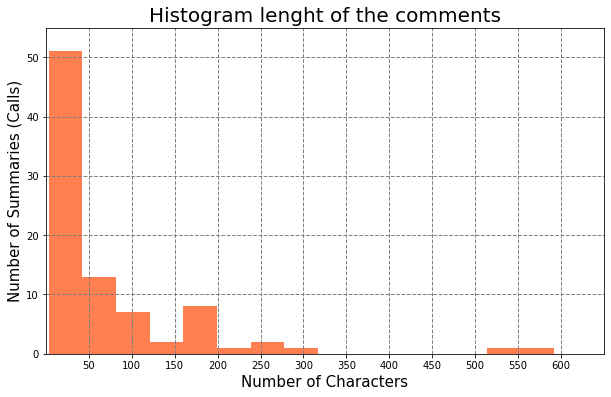

In [65]:
df2['ult_accions_hechas_es'].str.len().plot(kind='hist',
                                  figsize=(10, 6), 
                                  bins=15,
                                  xticks=np.arange(50, 650, step=50),
                                  color=['coral'],
                                  stacked=True,
                                  xlim=(0, 650),
                                  ylim=(0, 55)
                                 )

plt.title('Histogram lenght of the comments', fontsize = 20)
plt.ylabel('Number of Summaries (Calls)', fontsize = 15)
plt.xlabel('Number of Characters', fontsize = 15) 
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

In [54]:
df2['ult_accions_hechas_es'].str.len().max()

592

In [55]:
df2['ult_accions_hechas_es'].str.len().min()

3

In [56]:
df2['ult_accions_hechas_es'].str.len().mean()

70.24137931034483

Tenemos que 60 columnas llega como máximo a 25 y 20 llegan a 50. Conclusión, esta columna no tiene mucho texto. Vamos a ver que podemos sacar. 

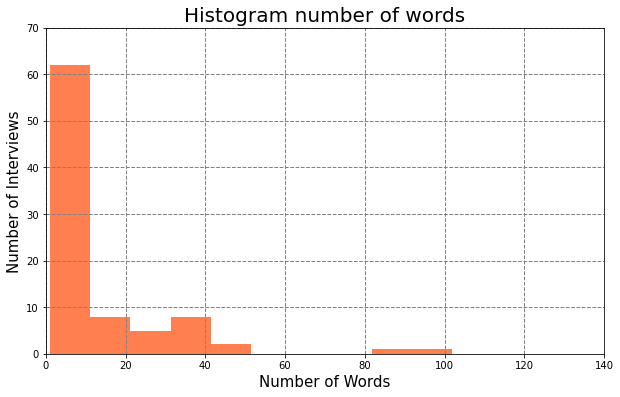

In [86]:
#def plot_word_number_histogram(text):
df2['ult_accions_hechas_es'].str.split().map(lambda x: len(x)).plot(
                                      kind='hist',
                                      figsize=(10, 6), 
                                      bins=10,
                                      xticks=np.arange(0, 150, step=20),
                                      color=['coral'],
                                      stacked=True,
                                      xlim=(0, 140),
                                      ylim = (0, 70))

plt.title('Histogram number of words', fontsize = 20)
plt.ylabel('Number of Interviews', fontsize = 15)
plt.xlabel('Number of Words', fontsize = 15) 
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()
    
#plot_word_number_histogram(df_text['Summary'])

Lo mismo con el histograma respecto al número de palabras. 

In [100]:
#Descargando y guardando las stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('spanish')
#Getting stopwords in our Translation 
df2['stopwords'] = df2['ult_accions_hechas_es'].apply(lambda x: len([x for x in x.split() if x in stop]))

#Displaying each Summary comment with it # of stopwords
df2[['ult_accions_hechas_es','stopwords']].head()

[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     gabacho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ult_accions_hechas_es,stopwords
0,cuida limpio hija trabaja,0
1,sigue trabajando en el mismo domicilio pero de...,18
3,compete técnicas,0
6,ha estado trabajando en un comercio de una fru...,23
7,ha ido a vivir a puerto llano ciudad real,3


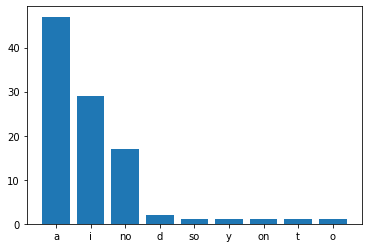

In [101]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(df2['ult_accions_hechas'])

In [102]:
#Quito "stopwords"
df2['ult_accions_hechas_es'] = df2['ult_accions_hechas_es'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Obteniendo las palabras más comunes...

In [106]:
#Steaming
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
st = SnowballStemmer('spanish')
df2['ult_accions_hechas_es'] = df2['ult_accions_hechas_es'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Graficando las más comunes sin stopwords

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

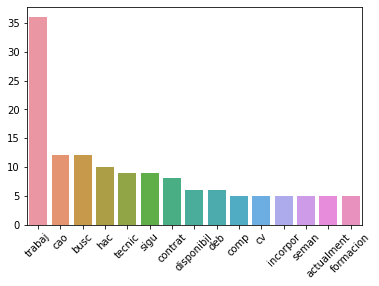

In [139]:
#Getting the most frequent words
freq = pd.Series(' '.join(df2['ult_accions_hechas_es']).split()).value_counts()[:15]
#Plotting...
sns.barplot(freq.index, freq.values)
plt.xticks(rotation=45)

La palabra más frecuente es "trabajo", le sigue "cao" que es un acrónimo. Después le sigue "buscar" que debería estar relacionado a trabajo.  

Podemos ver que __las "ultimas acciones hechas" más comunes son referente a buscar trabajo.__

Tal vez con un N-grama algo podamos encontrar algo más.

### 5.b.3 N-gram exploration

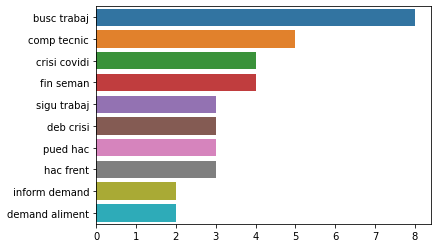

In [108]:
#Getting the "n-gram"
top_n_bigrams=get_top_ngram(df2['ult_accions_hechas_es'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

Vemos que el número de frecuencias en el 2-grama es muy bajo, pero siempre acaba apareciendo "busca trabajo", "comp tecnic" _(no se a que se refiere, necesitaría apoyo de Integramenet)_. Otra de las más frecuentes es "crisis coviden" que es referente a coronavirus. No se puede concluir mucho de aquí.

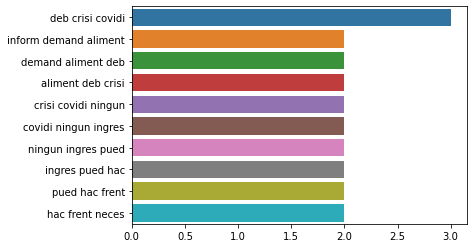

In [110]:
#-> 3-gram
top_tri_grams=get_top_ngram(df2['ult_accions_hechas_es'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

El 3-grama tambien tiene pocas frecuencias. 

### 5.b.4 WordCloud

Obtenemos el corpus...

In [122]:
corpus=[]
new = df2['ult_accions_hechas_es'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

Sacamos las frecuencias

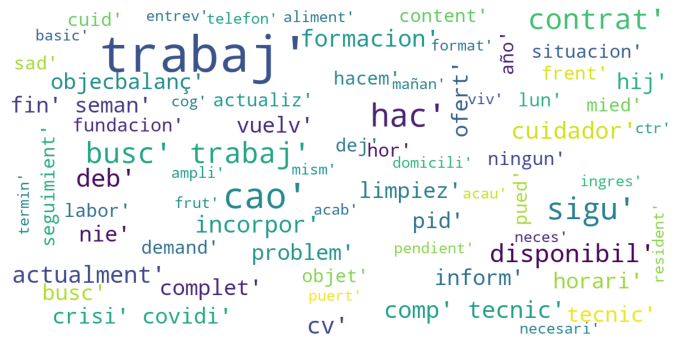

In [126]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=70,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### 5.b.5 Conclusiones

- Tenemos pocos registros (¡menos que en resumen!) además pocas palabras. Lo anterior, aunado a la traducción que hace perder mucha información, vemos que __para esta columna, el "NLP" no es nada apropiado.__

- Con __lo poco que encontramos__, vemos que las __palabras "top" son trabajo__... así que seguimos viendo que __la principal preocupación__ para los entrevistados es __encontrar trabajo__, y __no directamente el coronavirus__. 

- En caso de querer inicistir con esta variable, habrá que investigar como tratarla. 

## 5.c "Condiciones vivienda"

In [131]:
df.columns

Index(['documento', 'genero', 'incorpora', 'obj_laboral', 'estado',
       'ult_accions_hechas', 'estado_salud', 'vivienda', 'cond_vivienda',
       'municipio', 'padron', 'alimentacion', 'seguimento_ss', 'targeta_san',
       'autovaloracion_psicoemo', 'espera_dIntegramanet', 'resum'],
      dtype='object')

In [132]:
df.shape

(135, 17)

### 5.c.1 Preproceso

In [41]:
# We will work only with the column "Resum entrevista i observacions" 
df3 = df['cond_vivienda'].copy().to_frame()
df3.head(5) 

,cond_vivienda
0,"Bones. Viu amb filla, gendre i 1 net. Petita t..."
1,Considera que bones. Viu amb fill i marit en 2...
2,Viu en habitació propietat de la persona on tr...
3,NaN
4,Porta 2 mesos sense pagar


In [42]:
# Eliminating 'nan' values, in order to work only with the text
df3.dropna(subset = ['cond_vivienda'], inplace=True)

In [136]:
df3.shape

(111, 1)

111 de 135 tiene mejor pinta que la anterior variable, ya sabíamos que tenía 17% de missings.

In [43]:
df3['cond_vivienda']= df3['cond_vivienda'].astype(str)

In [44]:
#-> Convirtiendo minúsculas a mayúsculas
df3['cond_vivienda'] = df3['cond_vivienda'].apply(lambda x: " ".join(x.lower() for x in x.split()))

Traducimos __catalan -> español__

In [45]:
#objeto para usar la librería googletrans 
translator = Translator() 

#Añadiendo como nueva columna, la traducción a Español.
df3['cond_vivienda_es'] = df3['cond_vivienda'].apply(translator.translate, src='ca', dest='es').apply(getattr, args=('text',))

In [46]:
#Viendo si se realizó la traducción. 
df3['cond_vivienda_es'].head(5)

0    buenas. vive con hija, yerno y 1 limpio. peque...
1    considera que buenas. vive con hijo y marido e...
2    vive en habitación propiedad de la persona que...
4                              lleva 2 meses sin pagar
6                                         han mejorado
Name: cond_vivienda_es, dtype: object

In [47]:
#Eliminando los signos de puntuación
df3['cond_vivienda_es'] = df3['cond_vivienda_es'].str.replace('[^\w\s]','')
#Remplazando los carácteres numéricos
df3['cond_vivienda_es'] =  df3['cond_vivienda_es'].str.replace('\d+', '')

### 5.c.2 Analyzing text statistics

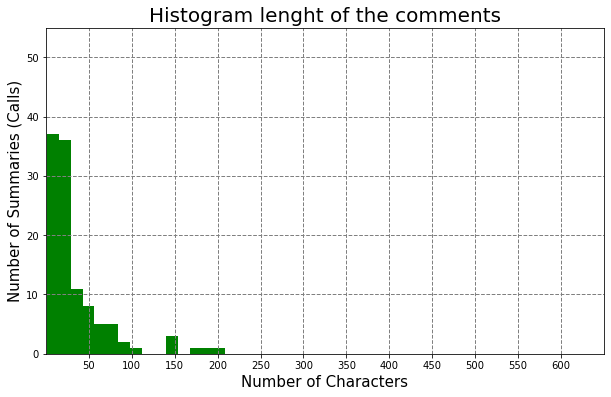

In [66]:
df3['cond_vivienda_es'].str.len().plot(kind='hist',
                                  figsize=(10, 6), 
                                  bins=15,
                                  xticks=np.arange(50, 650, step=50),
                                  color=['green'],
                                  stacked=True,
                                  xlim=(0, 650),
                                  ylim=(0, 55)
                                
                                 )

plt.title('Histogram lenght of the comments', fontsize = 20)
plt.ylabel('Number of Summaries (Calls)', fontsize = 15)
plt.xlabel('Number of Characters', fontsize = 15) 
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

In [60]:
df3['cond_vivienda_es'].str.len().max()

209

In [62]:
df3['cond_vivienda_es'].str.len().min()

1

In [63]:
df3['cond_vivienda_es'].str.len().mean()

33.9009009009009

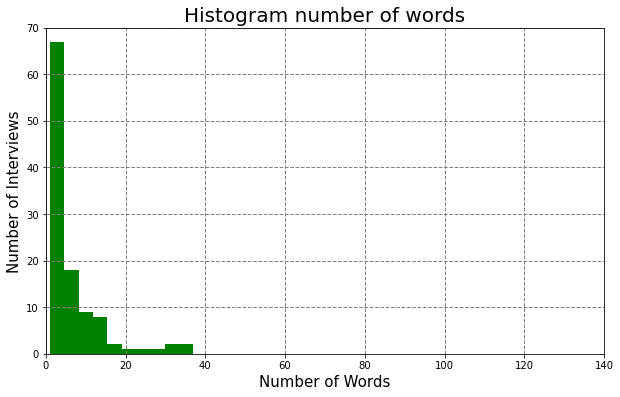

In [89]:
#def plot_word_number_histogram(text):
df3['cond_vivienda_es'].str.split().map(lambda x: len(x)).plot(
                                      kind='hist',
                                      figsize=(10, 6), 
                                      bins=10,
                                      xticks=np.arange(0, 150, step=20),
                                      color=['green'],
                                      stacked=True,
                                      xlim=(0, 140),
                                      ylim = (0, 70))

plt.title('Histogram number of words', fontsize = 20)
plt.ylabel('Number of Interviews', fontsize = 15)
plt.xlabel('Number of Words', fontsize = 15) 
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()
    
#plot_word_number_histogram(df_text['Summary'])

Casi 70 columnas tienen 5 parabras, es decir, también tenemos poco texto en esta variable. 

In [150]:
#Descargando y guardando las stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('spanish')
#Getting stopwords in our Translation 
df3['stopwords'] = df3['cond_vivienda_es'].apply(lambda x: len([x for x in x.split() if x in stop]))

#Displaying each Summary comment with it # of stopwords
df3[['cond_vivienda_es','stopwords']].head()

[nltk_data] Downloading package stopwords to C:\Users\El
[nltk_data]     gabacho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cond_vivienda_es,stopwords
0,buenas vive con hija yerno y limpio pequeña t...,2
1,considera que buenas vive con hijo y marido en...,4
2,vive en habitación propiedad de la persona que...,7
4,lleva meses sin pagar,1
6,han mejorado,1


In [151]:
#Quito "stopwords"
df3['cond_vivienda_es'] = df3['cond_vivienda_es'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [152]:
#Steaming
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
st = SnowballStemmer('spanish')
df3['cond_vivienda_es'] = df3['cond_vivienda_es'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

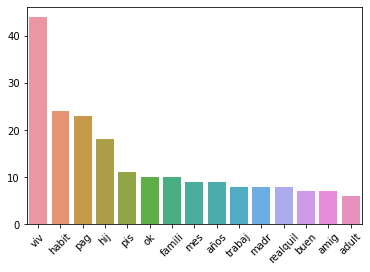

In [153]:
#Getting the most frequent words
freq = pd.Series(' '.join(df3['cond_vivienda_es']).split()).value_counts()[:15]
#Plotting...
sns.barplot(freq.index, freq.values)
plt.xticks(rotation=45)

### 5.c.3 N-gram

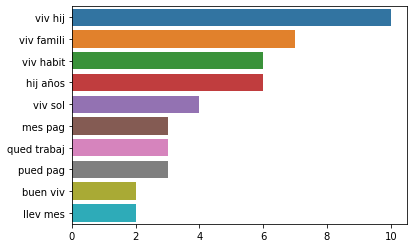

In [154]:
#Getting the "n-gram"
top_n_bigrams=get_top_ngram(df3['cond_vivienda_es'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

En el 2-grama la más destacada es "viv hij". Pero no hemos obtenido nada importante acerca de las condiciones de la vivienda de las personas. 

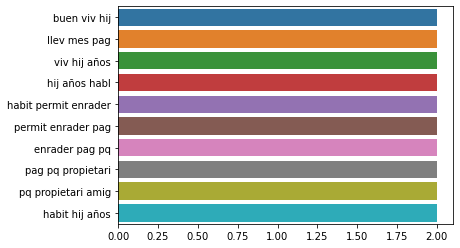

In [155]:
#-> 3-gram
top_tri_grams=get_top_ngram(df3['cond_vivienda_es'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

En el 3-grama hay muy poca información. 

### 5.c.4 Wordcloud

In [156]:
corpus=[]
new = df3['cond_vivienda_es'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

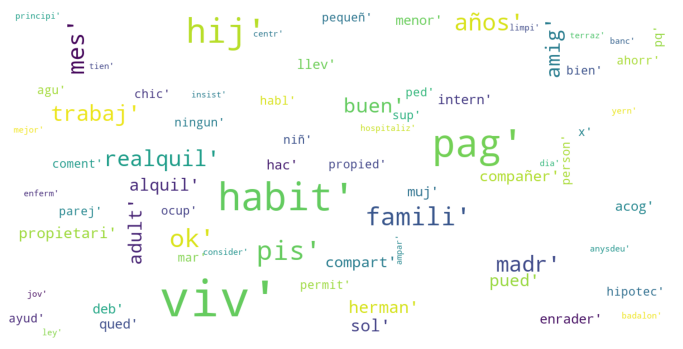

In [157]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=70,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### 5.c.5 Algunas conclusiones

A pesar que esta columna tenía más información, no se ha podido obtener mucha información. De lo poco que hemos podido observar es que respecto al habitage, parece que las personas entrevistadas estan pidiendo asilo con sus conocidos y familiares. 